In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [163]:
df_test = pd.read_csv("goods_test.csv")
df_train = pd.read_csv("goods_train.csv")

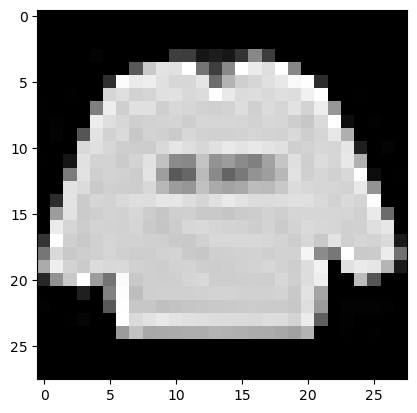

In [164]:
y_train = df_train.iloc[:, 0].values
x_train = df_train.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
x_test = df_test.iloc[:, 1:].values

pixels = df_train.iloc[0, 1:].values

pixels = pixels.reshape((28,28))

# Display the image
plt.imshow(pixels, cmap='gray')
plt.show()

In [165]:
import torch
import torch.optim as optim
import torch.nn as nn

In [166]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [167]:
from torch.utils.data import Dataset

#Dataset class with methods
class CustomImageDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
    def __len__(self):
        return len(self.x)
    def __getitem__(self, index):
        x = self.x[index]
        x = x.reshape(1, 28, 28).astype('float32')/255.0
        y = self.y[index].astype(float)
        y = np.array(y).reshape(-1,1)
        image = torch.from_numpy(x)
        label = torch.from_numpy(np.array(y))
        return (image, label)

In [168]:
#create two instances of the dataset object
dataset_train = CustomImageDataset(x_train, y_train)
dataset_test = CustomImageDataset(x_test, y_test)

#test the dataset classes
print(f"Length of the dataset is:{dataset_train.__len__()}")
print(f"Length of the dataset is:{dataset_test.__len__()}")
print(f"\nThe data point tuple is:{dataset_train.__getitem__(0)}")
print(f"\nThe data point tuple is:{dataset_test.__getitem__(0)}")

Length of the dataset is:60000
Length of the dataset is:10000

The data point tuple is:(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.2431, 0.2392, 0

In [169]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=dataset_train, batch_size=64)
test_loader = DataLoader(dataset=dataset_test, batch_size=12)

In [170]:
for i, (images, labels) in enumerate(test_loader):
    print(f'Batch {i+1}:')
    print('Images shape:', images.shape)
    print('Labels shape:', labels.shape)
    break

Batch 1:
Images shape: torch.Size([12, 1, 28, 28])
Labels shape: torch.Size([12, 1, 1])


In [171]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5,padding=2)
        self.conv2 = nn.Conv2d(32,64, kernel_size=5,padding=2)
        self.conv3 = nn.Conv2d(64,128, kernel_size=5,padding=2)
        self.dropout = nn.Dropout2d(p=0.2)
        self.fc1 = nn.Linear(7*7*128, 1000)
        self.fc2 = nn.Linear(1000,50)
        self.fc3 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2) 
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.conv2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.conv3(x)
        x = self.relu(x)

        x = x.view(-1, 7*7*128)

        x = self.relu(self.fc1(x))

        x = self.fc2(x)
        x = self.fc3(x)
        return x 


In [172]:
from torchsummary import summary
model = Net()   # Instantiate the model object
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          51,264
         Dropout2d-5           [-1, 64, 14, 14]               0
              ReLU-6           [-1, 64, 14, 14]               0
         MaxPool2d-7             [-1, 64, 7, 7]               0
            Conv2d-8            [-1, 128, 7, 7]         204,928
              ReLU-9            [-1, 128, 7, 7]               0
           Linear-10                 [-1, 1000]       6,273,000
             ReLU-11                 [-1, 1000]               0
           Linear-12                   [-1, 50]          50,050
           Linear-13                   [-1, 10]             510
Total params: 6,580,584
Trainable param

In [173]:
lr = 0.001
n_epochs = 2

# Loss function for multiclass classification
loss_fn = nn.CrossEntropyLoss()

log_interval = 10 # Variable used to display the gradient descent progress

# Instantiate the optimizer with Adam for gradient descent
optimizer = optim.Adam(model.parameters(),lr=lr)

In [174]:
train_losses = []
train_counter = []

test_losses = []
test_counter = [i*len(dataset_train) for i in range(n_epochs + 1)]

In [175]:
def train(epoch):
    model.train()
    
    # Read mini batch of training from dataloader and assign read in values to variables
    for batch_idx, (data, target) in enumerate(train_loader):
        data,target = data.float(),target.long()
        #print(data,target)
        
        # Clear the cache from past gradient values
        optimizer.zero_grad()
        
        # Predict on training data
        output = model(data)
        
        # Remove the additional dimension
        output = torch.squeeze(output) 
        target = torch.squeeze(target)
        #print(output.shape,target.shape)
        
        # Compute loss, back propogate and update weights
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        
        # Bunch of code to print the progress every 10 epochs
        if batch_idx % log_interval == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(dataset_train)} {100. * batch_idx* len(data) / len(dataset_train):.0f}%)]\tLoss: {loss.item():.6f}")
            
            # Store counter and loss values
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(dataset_train)))
            
            # Save the model and the weight parameters
            torch.save(model.state_dict(), 'model.pth')
            torch.save(optimizer.state_dict(), 'results.pth')

In [176]:
def test():
    model.eval()
    
    # Create variable to compute accuracy
    test_loss = 0
    correct = 0
    
    # Make sure gradient descent is not happening
    with torch.no_grad():
        for data, target in test_loader:
            data,target = data.float(),target.long()
            output = model(data)
            
            # Remove additional dimension
            output = torch.squeeze(output)
            target = torch.squeeze(target)
            #print(output.shape,target.shape)
            
            # Compute loss and add
            test_loss += loss_fn(output, target).item()
            
            # Store the predicted value
            pred = output.data.max(1, keepdim=True)[1]
            
            # Compute accuracy
            correct += pred.eq(target.data.view_as(pred)).sum()
    # Compute average test loss 
    test_loss /= len(test_loader)
    
    # Store loss values
    test_losses.append(test_loss)
    
    print(f"\nTest set: Avg. loss: {test_loss:.4f}, Accuracy: {correct}/{len(dataset_test)} ({100. * correct / len(dataset_test):.0f}%)")

In [177]:
import time
from datetime import timedelta

start_time = time.time()

# Perform lots of computations.

test()
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()
    
elapsed_time_secs = time.time() - start_time

msg = "Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(msg)


Test set: Avg. loss: 2.3050, Accuracy: 1002/10000 (10%)
Train Epoch: 1 [0/60000 0%)]	Loss: 2.301112
Train Epoch: 1 [640/60000 1%)]	Loss: 1.349839
Train Epoch: 1 [1280/60000 2%)]	Loss: 1.049890
Train Epoch: 1 [1920/60000 3%)]	Loss: 0.839392
Train Epoch: 1 [2560/60000 4%)]	Loss: 0.923721
Train Epoch: 1 [3200/60000 5%)]	Loss: 0.799093
Train Epoch: 1 [3840/60000 6%)]	Loss: 0.655161
Train Epoch: 1 [4480/60000 7%)]	Loss: 0.769075
Train Epoch: 1 [5120/60000 9%)]	Loss: 0.884420
Train Epoch: 1 [5760/60000 10%)]	Loss: 0.613774
Train Epoch: 1 [6400/60000 11%)]	Loss: 0.767232
Train Epoch: 1 [7040/60000 12%)]	Loss: 0.640618
Train Epoch: 1 [7680/60000 13%)]	Loss: 0.678926
Train Epoch: 1 [8320/60000 14%)]	Loss: 0.548491
Train Epoch: 1 [8960/60000 15%)]	Loss: 0.459529
Train Epoch: 1 [9600/60000 16%)]	Loss: 0.424562
Train Epoch: 1 [10240/60000 17%)]	Loss: 0.461450
Train Epoch: 1 [10880/60000 18%)]	Loss: 0.631260
Train Epoch: 1 [11520/60000 19%)]	Loss: 0.372738
Train Epoch: 1 [12160/60000 20%)]	Loss: 0

Text(0, 0.5, 'negative log likelihood loss')

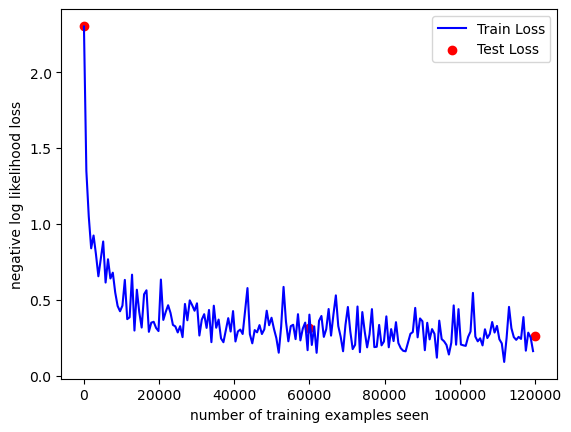

In [178]:
# Plot the loss curve

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [186]:
from skimage.io import imsave, imread
from skimage import io,transform
from skimage.color import rgb2gray

def classify(model,image,classes,count):
    image = io.imread(image)
    print(image.shape)

    
    # Check if image has more than 2 channels (RGB type) and if yes convert to grayscale
    if len(image.shape) > 2:
        image = rgb2gray(image)
        
    
    # Transform to correct shape
    image = transform.resize(image,(28,28))
    #image = image/255
    print(image.shape)
    
    # Put in eval mode
    model = model.eval()
    optimizer.zero_grad()
    with torch.no_grad():
        image = torch.from_numpy(image) # Convert to torch tensor
        image = image.float() # of type float

        image = image.unsqueeze(0) # Add additional dimension to represent batch sie of 1

        # Predict
        output = model(image)
        print(f"Predictions:\n{output.data}\n")

        # Pick the value with the highest probability score in the output
        _,predicted = torch.max(output.data,1)
        print(f"Predicted Number:{classes[classes[predicted.item()]]}\n")

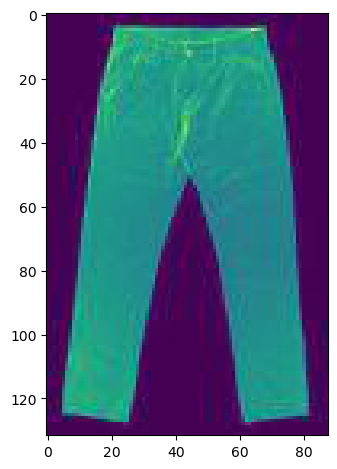

(132, 88, 3)
(28, 28)
Predictions:
tensor([[-0.1177,  6.3075, -1.7892,  0.4570, -1.2376, -3.2653,  0.6942, -2.5895,
          2.4131, -2.0698]])

Predicted Number:1



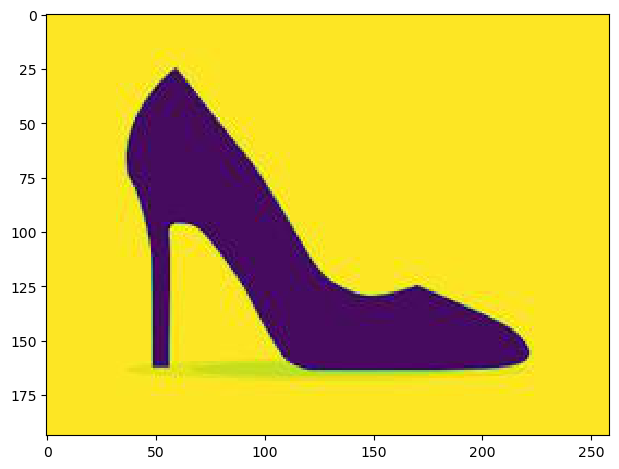

(194, 259, 3)
(28, 28)
Predictions:
tensor([[ 0.7911, -1.5038, -0.5178, -2.3526, -3.3605,  1.9835, -0.2131, -2.0416,
          3.7006,  1.0867]])

Predicted Number:8



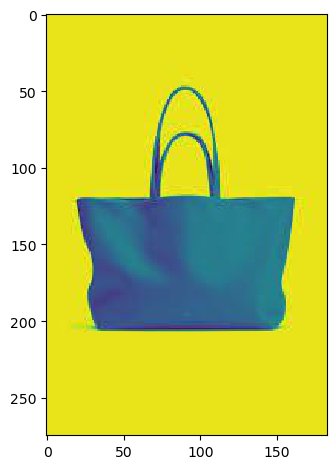

(275, 183, 3)
(28, 28)
Predictions:
tensor([[ 0.8649, -1.9765, -1.8541, -1.7768, -3.0558, -0.6469,  0.0990, -2.2042,
          6.4607, -0.7435]])

Predicted Number:8



In [188]:
pics = ['trouser1.jpg', 'shoe1.jpg', 'bag1.jpg']

count = 0

# Define the classes
classes = [0,1,2,3,4,5,6,7,8,9]

read_in_images = []  # To store the images read in

# Call the prediction function
for i in pics:
    im = io.imread(i)
    io.imshow(im)
    plt.show()
    classify(model,i,classes,count)
    count += 1

One challange I faced was I was trying to hot encode the labels as at first I saw this problem as a regular clasification problem. This made my code alot more complex. When I changed to aproaching the problem as a multi-clasification problem, things got alot more simpeler and I starting making more progress.

In your example I saw that the accuracy was 97%, so when I was testing my model and it was coming out to 91% I tryed adding another convolution layer and one more linear layer this almost doubled the time it took to train the model and dropped the accuracy to 90%.
After seeing this I realized that 91% might be the best i'm going to get and removed the additional layers.

I think the model I have workes well, with an accuracy of 91%. The model predicted 2 of the 3 new images to the right catagory so I think this reflexts the 91% accuracy